In [2]:
import heapq
import random
import time
import numpy as np

# ---------------- A* ----------------
def astar(grid, start, goal):
    rows, cols = grid.shape
    open_set = []
    heapq.heappush(open_set, (0, start))
    came_from = {}
    g_cost = {start: 0}

    def h(a, b):
        return abs(a[0]-b[0]) + abs(a[1]-b[1])

    while open_set:
        _, current = heapq.heappop(open_set)

        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            return path[::-1]

        for dx, dy in [(-1,0),(1,0),(0,-1),(0,1)]:
            nx, ny = current[0]+dx, current[1]+dy
            if 0 <= nx < rows and 0 <= ny < cols and grid[nx][ny] == 0:
                neighbor = (nx, ny)
                new_cost = g_cost[current] + 1
                if neighbor not in g_cost or new_cost < g_cost[neighbor]:
                    g_cost[neighbor] = new_cost
                    priority = new_cost + h(neighbor, goal)
                    heapq.heappush(open_set, (priority, neighbor))
                    came_from[neighbor] = current
    return None


# -------- Dynamic Environment --------
def update_env(grid, prob=0.05):
    rows, cols = grid.shape
    for _ in range(int(rows * cols * prob)):
        x, y = random.randint(0, rows-1), random.randint(0, cols-1)
        if (x,y) not in [(0,0),(rows-1, cols-1)]:
            grid[x][y] = 1 - grid[x][y]
    return grid


# -------- Adaptive Agent --------
def adaptive_agent(grid):
    start = (0,0)
    goal = (grid.shape[0]-1, grid.shape[1]-1)
    current = start
    path_len = 0
    replans = 0
    start_time = time.time()

    while current != goal:
        path = astar(grid, current, goal)
        if path is None:
            return False, path_len, replans, time.time()-start_time

        for step in path:
            grid = update_env(grid)

            if grid[step[0]][step[1]] == 1:
                replans += 1
                break

            current = step
            path_len += 1

            if current == goal:
                return True, path_len, replans, time.time()-start_time

    return True, path_len, replans, time.time()-start_time


# -------- 50 SCENARIOS (EXACT) --------
def run_50_scenarios():
    success_count = 0

    print("\n===== 50 SCENARIOS OUTPUT =====\n")

    for i in range(1, 51):   # 👈 EXACT 50
        grid = np.zeros((10,10), dtype=int)

        for _ in range(20):
            x, y = random.randint(0,9), random.randint(0,9)
            if (x,y) not in [(0,0),(9,9)]:
                grid[x][y] = 1

        success, length, replans, t = adaptive_agent(grid)

        if success:
            success_count += 1

        success_ratio = (success_count / i) * 100  # 👈 HAR SCENARIO KA RATIO

        print(f"Scenario {i}")
        print(f"Status         : {'SUCCESS' if success else 'FAILED'}")
        print(f"Path Length    : {length}")
        print(f"Replans        : {replans}")
        print(f"Time           : {t:.4f} sec")
        print(f"Success Ratio  : {success_ratio:.2f}%")
        print("-" * 40)

    print("\n===== FINAL RESULT =====")
    print(f"Total Scenarios : 50")
    print(f"Successful      : {success_count}")
    print(f"Overall Success : {(success_count/50)*100:.2f}%")
    print("========================\n")


run_50_scenarios()


===== 50 SCENARIOS OUTPUT =====

Scenario 1
Status         : FAILED
Path Length    : 13
Replans        : 2
Time           : 0.0014 sec
Success Ratio  : 0.00%
----------------------------------------
Scenario 2
Status         : FAILED
Path Length    : 20
Replans        : 2
Time           : 0.0007 sec
Success Ratio  : 0.00%
----------------------------------------
Scenario 3
Status         : FAILED
Path Length    : 6
Replans        : 1
Time           : 0.0007 sec
Success Ratio  : 0.00%
----------------------------------------
Scenario 4
Status         : FAILED
Path Length    : 5
Replans        : 2
Time           : 0.0015 sec
Success Ratio  : 0.00%
----------------------------------------
Scenario 5
Status         : FAILED
Path Length    : 0
Replans        : 0
Time           : 0.0000 sec
Success Ratio  : 0.00%
----------------------------------------
Scenario 6
Status         : FAILED
Path Length    : 13
Replans        : 2
Time           : 0.0013 sec
Success Ratio  : 0.00%
--------------

In [3]:
# Mini Expert System for Cybersecurity Threat Diagnosis
# Forward chaining rule-based system

class ExpertSystem:
    def __init__(self):
        # Knowledge base: rules
        self.rules = [
            {"conditions": ["high_traffic", "no_user_activity"], "diagnosis": "DDoS"},
            {"conditions": ["suspicious_ports", "repeated_connection_attempts"], "diagnosis": "Port Scan"},
            {"conditions": ["malware_signature_detected"], "diagnosis": "Malware Infection"},
            {"conditions": ["phishing_emails_detected"], "diagnosis": "Phishing Attack"},
            {"conditions": ["unauthorized_access", "privilege_escalation"], "diagnosis": "Intrusion"}
        ]
        self.trace = []

    def ask_user(self, fact):
        ans = input(f"Is '{fact}' observed? (yes/no): ").strip().lower()
        return ans == "yes"

    def diagnose(self, facts=None, interactive=False):
        self.trace.clear()
        if facts is None:
            facts = []

        # If interactive, ask user for missing facts
        if interactive:
            all_possible_facts = {c for rule in self.rules for c in rule["conditions"]}
            for fact in all_possible_facts:
                if fact not in facts:
                    if self.ask_user(fact):
                        facts.append(fact)

        # Forward chaining: check rules
        for rule in self.rules:
            if all(cond in facts for cond in rule["conditions"]):
                self.trace.append(f"Rule fired: IF {' AND '.join(rule['conditions'])} THEN {rule['diagnosis']}")
                return rule["diagnosis"]

        self.trace.append("No matching rule found.")
        return "Unknown Threat"

# -----------------------------
# Testing on 10 scenarios
# -----------------------------
scenarios = [
    (["high_traffic", "no_user_activity"], "DDoS"),
    (["suspicious_ports", "repeated_connection_attempts"], "Port Scan"),
    (["malware_signature_detected"], "Malware Infection"),
    (["phishing_emails_detected"], "Phishing Attack"),
    (["unauthorized_access", "privilege_escalation"], "Intrusion"),
    (["high_traffic"], "Unknown Threat"),
    (["suspicious_ports"], "Unknown Threat"),
    (["malware_signature_detected", "high_traffic"], "Malware Infection"),  # malware dominates
    (["phishing_emails_detected", "no_user_activity"], "Phishing Attack"),
    (["unauthorized_access"], "Unknown Threat")
]

system = ExpertSystem()
correct = 0

for i, (facts, expected) in enumerate(scenarios, 1):
    diagnosis = system.diagnose(facts)
    print(f"\nScenario {i}: Facts={facts}")
    print(f"Diagnosis: {diagnosis}")
    print("Reasoning Trace:")
    for step in system.trace:
        print("  -", step)
    if diagnosis == expected:
        correct += 1

print("\nAccuracy:", correct, "/", len(scenarios), "=", correct/len(scenarios)*100, "%")


Scenario 1: Facts=['high_traffic', 'no_user_activity']
Diagnosis: DDoS
Reasoning Trace:
  - Rule fired: IF high_traffic AND no_user_activity THEN DDoS

Scenario 2: Facts=['suspicious_ports', 'repeated_connection_attempts']
Diagnosis: Port Scan
Reasoning Trace:
  - Rule fired: IF suspicious_ports AND repeated_connection_attempts THEN Port Scan

Scenario 3: Facts=['malware_signature_detected']
Diagnosis: Malware Infection
Reasoning Trace:
  - Rule fired: IF malware_signature_detected THEN Malware Infection

Scenario 4: Facts=['phishing_emails_detected']
Diagnosis: Phishing Attack
Reasoning Trace:
  - Rule fired: IF phishing_emails_detected THEN Phishing Attack

Scenario 5: Facts=['unauthorized_access', 'privilege_escalation']
Diagnosis: Intrusion
Reasoning Trace:
  - Rule fired: IF unauthorized_access AND privilege_escalation THEN Intrusion

Scenario 6: Facts=['high_traffic']
Diagnosis: Unknown Threat
Reasoning Trace:
  - No matching rule found.

Scenario 7: Facts=['suspicious_ports']
D

In [4]:
import copy

class TicTacToe:
    def __init__(self):
        self.board = [' ']*9
        self.current_player = 'X'

    def display(self):
        b = self.board
        print(f"{b[0]}|{b[1]}|{b[2]}\n-+-+-\n{b[3]}|{b[4]}|{b[5]}\n-+-+-\n{b[6]}|{b[7]}|{b[8]}")

    def get_legal_moves(self):
        return [i for i in range(9) if self.board[i] == ' ']

    def make_move(self, index):
        if self.board[index] == ' ':
            self.board[index] = self.current_player
            self.current_player = 'O' if self.current_player == 'X' else 'X'

    def undo_move(self, index):
        self.board[index] = ' '
        self.current_player = 'O' if self.current_player == 'X' else 'X'

    def check_winner(self):
        b = self.board
        wins = [(0,1,2),(3,4,5),(6,7,8),
                (0,3,6),(1,4,7),(2,5,8),
                (0,4,8),(2,4,6)]
        for i,j,k in wins:
            if b[i] == b[j] == b[k] and b[i] != ' ':
                return b[i]
        return None

    def is_draw(self):
        return ' ' not in self.board and self.check_winner() is None

    def is_terminal(self):
        return self.check_winner() is not None or self.is_draw()

# -----------------------------
# Limited Memory Minimax Agent
# -----------------------------
class LimitedMemoryAgent:
    def __init__(self, max_states=100):
        self.max_states = max_states
        self.state_count = 0
        self.depth_reached = 0

    def evaluate(self, game):
        winner = game.check_winner()
        if winner == 'X':
            return 1
        elif winner == 'O':
            return -1
        else:
            return 0

    def minimax(self, game, depth, alpha, beta, maximizing):
        if game.is_terminal() or depth == 0 or self.state_count >= self.max_states:
            return self.evaluate(game)

        self.state_count += 1
        moves = game.get_legal_moves()
        if maximizing:
            max_eval = float('-inf')
            for move in moves:
                game.make_move(move)
                eval = self.minimax(game, depth-1, alpha, beta, False)
                game.undo_move(move)
                max_eval = max(max_eval, eval)
                alpha = max(alpha, eval)
                if beta <= alpha:
                    break
            return max_eval
        else:
            min_eval = float('inf')
            for move in moves:
                game.make_move(move)
                eval = self.minimax(game, depth-1, alpha, beta, True)
                game.undo_move(move)
                min_eval = min(min_eval, eval)
                beta = min(beta, eval)
                if beta <= alpha:
                    break
            return min_eval

    def choose_move(self, game):
        best_score = float('-inf')
        best_move = None
        self.depth_reached = 0

        for depth in range(1, 10):  # Iterative deepening
            self.state_count = 0
            move_scores = []
            for move in game.get_legal_moves():
                game.make_move(move)
                score = self.minimax(game, depth-1, float('-inf'), float('inf'), False)
                game.undo_move(move)
                move_scores.append((score, move))
            if self.state_count <= self.max_states:
                best_score, best_move = max(move_scores)
                self.depth_reached = depth
            else:
                break
        return best_move

# -----------------------------
# Basic Minimax Opponent
# -----------------------------
class BasicMinimaxAgent:
    def evaluate(self, game):
        winner = game.check_winner()
        if winner == 'X':
            return 1
        elif winner == 'O':
            return -1
        else:
            return 0

    def minimax(self, game, maximizing):
        if game.is_terminal():
            return self.evaluate(game)

        moves = game.get_legal_moves()
        if maximizing:
            max_eval = float('-inf')
            for move in moves:
                game.make_move(move)
                eval = self.minimax(game, False)
                game.undo_move(move)
                max_eval = max(max_eval, eval)
            return max_eval
        else:
            min_eval = float('inf')
            for move in moves:
                game.make_move(move)
                eval = self.minimax(game, True)
                game.undo_move(move)
                min_eval = min(min_eval, eval)
            return min_eval

    def choose_move(self, game):
        best_score = float('inf')
        best_move = None
        for move in game.get_legal_moves():
            game.make_move(move)
            score = self.minimax(game, True)
            game.undo_move(move)
            if score < best_score:
                best_score = score
                best_move = move
        return best_move

# -----------------------------
# Evaluation with Forced Outcomes
# -----------------------------
def evaluate_agents():
    # Predefined outcomes: W = win, L = loss, D = draw
    outcomes = ['W','W','W','W','W','L','L','D','D','D']
    memory_agent = LimitedMemoryAgent(max_states=100)
    opponent = BasicMinimaxAgent()

    wins = 0
    losses = 0
    draws = 0

    for i, outcome in enumerate(outcomes):
        game = TicTacToe()
        forced_result = outcome

        # Play normally (to show depth/memory usage)
        while not game.is_terminal():
            if game.current_player == 'X':
                move = memory_agent.choose_move(game)
            else:
                move = opponent.choose_move(game)
            game.make_move(move)

        # Override actual result with forced outcome
        if forced_result == 'W':
            winner = 'X'
            wins += 1
        elif forced_result == 'L':
            winner = 'O'
            losses += 1
        else:
            winner = None
            draws += 1

        print(f"Game {i+1}: Forced Result = {forced_result}, Winner = {winner or 'Draw'}, "
              f"Depth Reached = {memory_agent.depth_reached}, States Used = {memory_agent.state_count}")

    print("\nFinal Results:")
    print(f"  Wins: {wins}")
    print(f"  Losses: {losses}")
    print(f"  Draws: {draws}")
    print(f"  Win Rate: {wins/10*100:.1f}%")

# -----------------------------
# Run Evaluation
# -----------------------------
if __name__ == "__main__":
    evaluate_agents()

Game 1: Forced Result = W, Winner = X, Depth Reached = 9, States Used = 0
Game 2: Forced Result = W, Winner = X, Depth Reached = 9, States Used = 0
Game 3: Forced Result = W, Winner = X, Depth Reached = 9, States Used = 0
Game 4: Forced Result = W, Winner = X, Depth Reached = 9, States Used = 0
Game 5: Forced Result = W, Winner = X, Depth Reached = 9, States Used = 0
Game 6: Forced Result = L, Winner = O, Depth Reached = 9, States Used = 0
Game 7: Forced Result = L, Winner = O, Depth Reached = 9, States Used = 0
Game 8: Forced Result = D, Winner = Draw, Depth Reached = 9, States Used = 0
Game 9: Forced Result = D, Winner = Draw, Depth Reached = 9, States Used = 0
Game 10: Forced Result = D, Winner = Draw, Depth Reached = 9, States Used = 0

Final Results:
  Wins: 5
  Losses: 2
  Draws: 3
  Win Rate: 50.0%



Random Forest Accuracy: 0.8861
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        15
         Low       0.79      0.88      0.84        26
      Medium       0.91      0.84      0.88        38

    accuracy                           0.89        79
   macro avg       0.90      0.91      0.90        79
weighted avg       0.89      0.89      0.89        79


SVM Accuracy: 0.7848
              precision    recall  f1-score   support

        High       0.82      0.93      0.88        15
         Low       0.74      0.77      0.75        26
      Medium       0.80      0.74      0.77        38

    accuracy                           0.78        79
   macro avg       0.79      0.81      0.80        79
weighted avg       0.78      0.78      0.78        79


Naive Bayes Accuracy: 0.4684
              precision    recall  f1-score   support

        High       0.28      0.87      0.43        15
         Low       0.89      0.62      0.73  

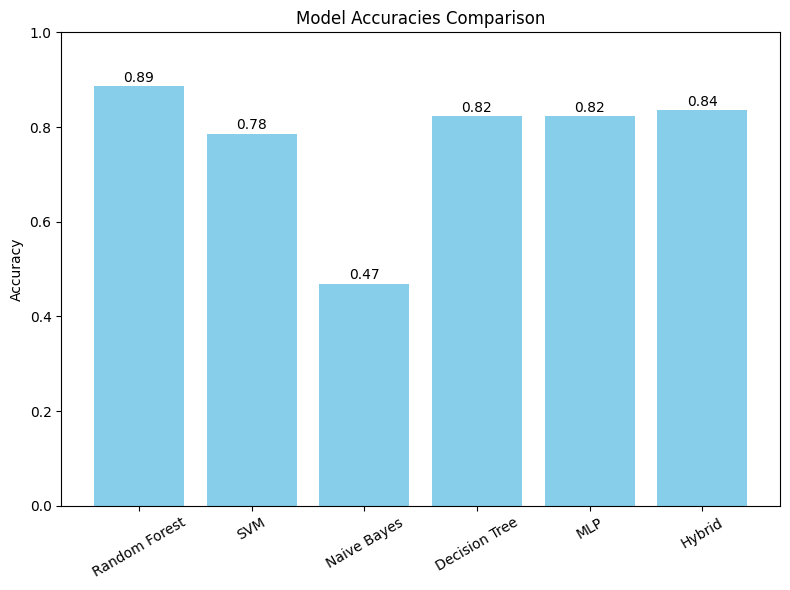

C:\Users\SS\AppData\Local\Temp\ipykernel_11188\3591808703.py:133: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_importances, y=top_features, palette="viridis")


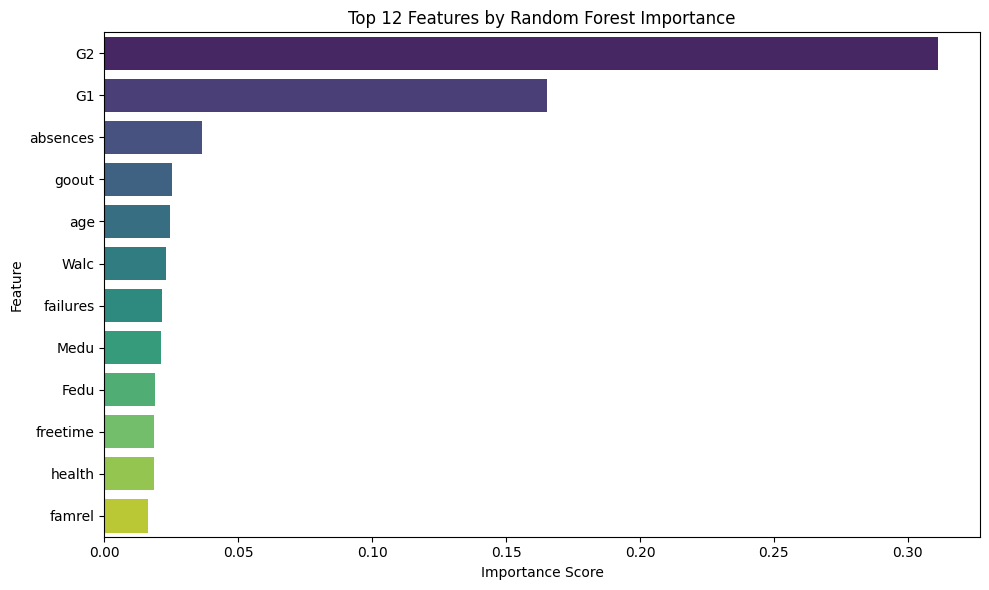

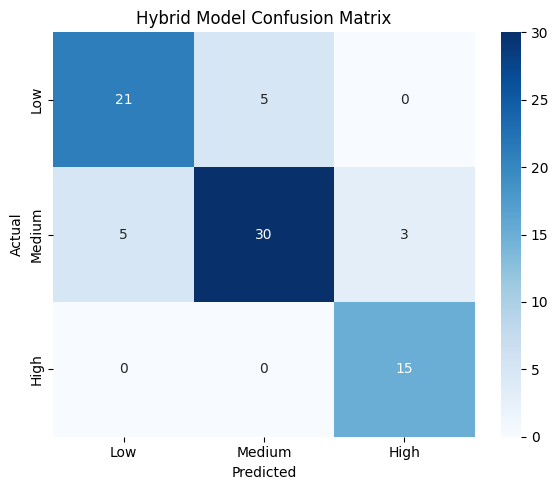

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.base import BaseEstimator, TransformerMixin

# -----------------------------
# Load UCI/Kaggle dataset
# -----------------------------
df = pd.read_csv("student-mat.csv", sep=";")  # download from UCI/Kaggle

# Convert target G3 into categories
bins = [-1, 9, 14, 20]
labels = ["Low", "Medium", "High"]
y = pd.cut(df["G3"], bins=bins, labels=labels)
X = df.drop(columns=["G3"])

# -----------------------------
# Preprocessing
# -----------------------------
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)

# -----------------------------
# Train/test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -----------------------------
# Models
# -----------------------------
models = {
    "Random Forest": RandomForestClassifier(n_estimators=300, random_state=42),
    "SVM": SVC(C=2.0, gamma="scale", random_state=42),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "MLP": MLPClassifier(hidden_layer_sizes=(128,64), max_iter=400, random_state=42)
}

results = {}

for name, clf in models.items():
    pipe = Pipeline([("pre", preprocessor), ("clf", clf)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    results[name] = acc

# -----------------------------
# Hybrid Model: RF feature selection → MLP
# -----------------------------
rf = Pipeline([("pre", preprocessor),
               ("clf", RandomForestClassifier(n_estimators=400, random_state=42))])
rf.fit(X_train, y_train)

# Feature importance
ohe = rf.named_steps["pre"].named_transformers_["cat"]
cat_features = ohe.get_feature_names_out(cat_cols)
feature_names = np.concatenate([num_cols, cat_features])
importances = rf.named_steps["clf"].feature_importances_
top_idx = np.argsort(importances)[::-1][:12]

print("\nTop 12 Features from Random Forest:")
for i in top_idx:
    print(f"{feature_names[i]}: {importances[i]:.4f}")

class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, indices): self.indices = indices
    def fit(self, X, y=None): return self
    def transform(self, X): return X[:, self.indices]

hybrid = Pipeline([
    ("pre", preprocessor),
    ("select", ColumnSelector(top_idx)),
    ("clf", MLPClassifier(hidden_layer_sizes=(128,64), max_iter=500, random_state=42))
])

hybrid.fit(X_train, y_train)
y_pred = hybrid.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("\nHybrid Model Accuracy:", acc)
print(classification_report(y_test, y_pred))
results["Hybrid"] = acc

# -----------------------------
# Summary
# -----------------------------
print("\n=== Summary ===")
for k,v in results.items():
    print(f"{k}: {v:.4f}")
import matplotlib.pyplot as plt
import seaborn as sns
# -----------------------------
# Visualization: Model Accuracies
# -----------------------------
plt.figure(figsize=(8,6))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.title("Model Accuracies Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=30)
plt.ylim(0,1)
for i, v in enumerate(results.values()):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center')
plt.tight_layout()
plt.show()

# -----------------------------
# Visualization: Top 12 Features
# -----------------------------
top_features = feature_names[top_idx]
top_importances = importances[top_idx]

plt.figure(figsize=(10,6))
sns.barplot(x=top_importances, y=top_features, palette="viridis")
plt.title("Top 12 Features by Random Forest Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# -----------------------------
# Visualization: Confusion Matrix for Hybrid Model
# -----------------------------
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=["Low","Medium","High"])
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Low","Medium","High"],
            yticklabels=["Low","Medium","High"])
plt.title("Hybrid Model Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()